# Super Market Sales EDA

## Download Dataset

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("akashbommidi/super-market-sales")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/akashbommidi/super-market-sales/versions/1


In [2]:
!ls /root/.cache/kagglehub/datasets/akashbommidi/super-market-sales/versions/1

supermarket_sales.csv


## Import Dependencies

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt


## Read Dataset

In [4]:
df = pd.read_csv(path + "/supermarket_sales.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Create DateTime, set it as index, sort it, drop Date, Time, Invoice ID and gross margin percentage

In [ ]:
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.set_index('DateTime', inplace=True)
df.sort_index(inplace=True)
df.drop(['Date', 'Time', 'Invoice ID'], axis=1, inplace=True)
df.drop('gross margin percentage', axis=1, inplace=True)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,DateTime
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00


In [ ]:
df_orig = df.copy()

# EDA

#### Column Encoding to check correlation between variables

In [ ]:
columns = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']
le = []
i=0
for col in columns:
    le.append(LabelEncoder())
    df[col] = le[i].fit_transform(df[col])
    i+=1


### Correlation Analysis

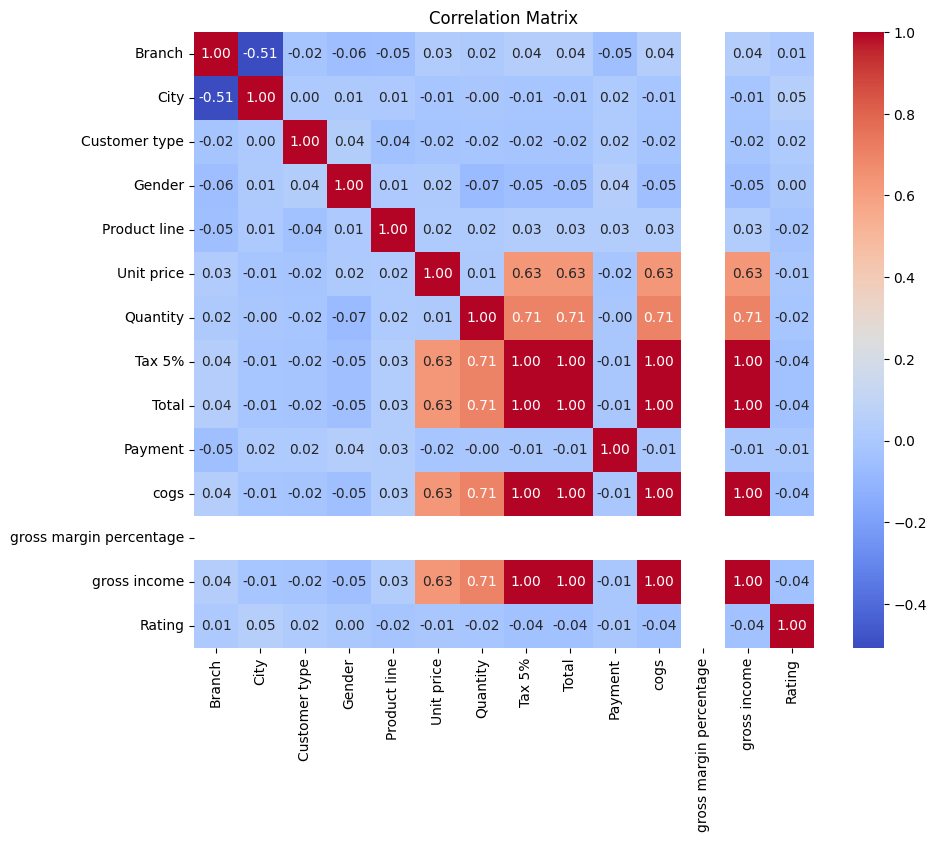

In [ ]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#### Divide df in branches for EDA

In [ ]:
df_branch_0 = df[df['Branch'] == 0]
df_branch_1 = df[df['Branch'] == 1]
df_branch_2 = df[df['Branch'] == 2]

### Monthly Gross Income by Branch

/tmp/ipykernel_158065/849846382.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_gross_income = df_branch_0['gross income'].resample('M').sum()


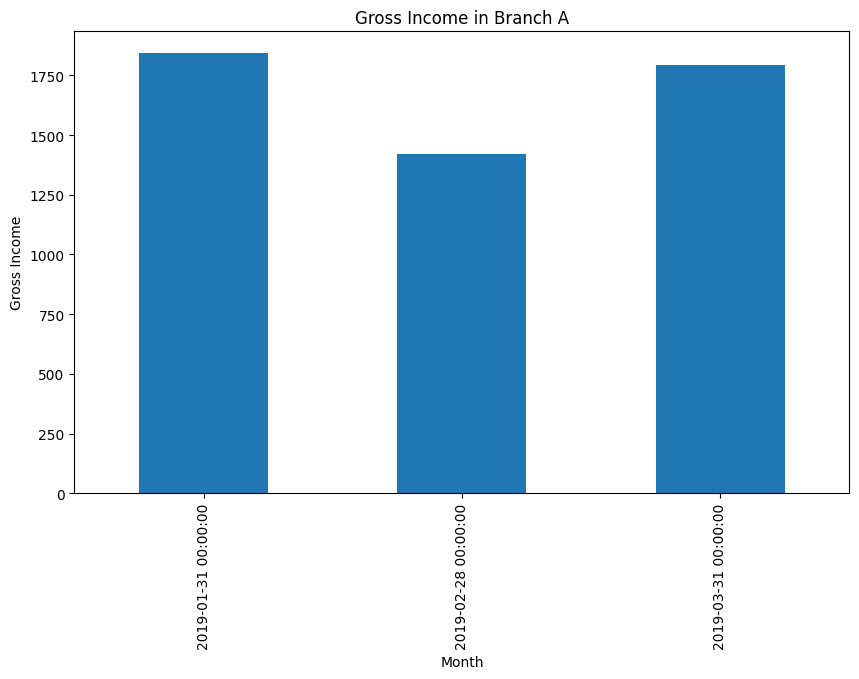

In [23]:
# Resample the data by month and sum the gross income
monthly_gross_income = df_branch_0['gross income'].resample('M').sum()

# Plot the monthly gross income
monthly_gross_income.plot(kind='bar', figsize=(10, 6), title='Gross Income in Branch A')
plt.xlabel('Month')
plt.ylabel('Gross Income')
plt.show()

/tmp/ipykernel_158065/4127158307.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_gross_income = df_branch_1['gross income'].resample('M').sum()


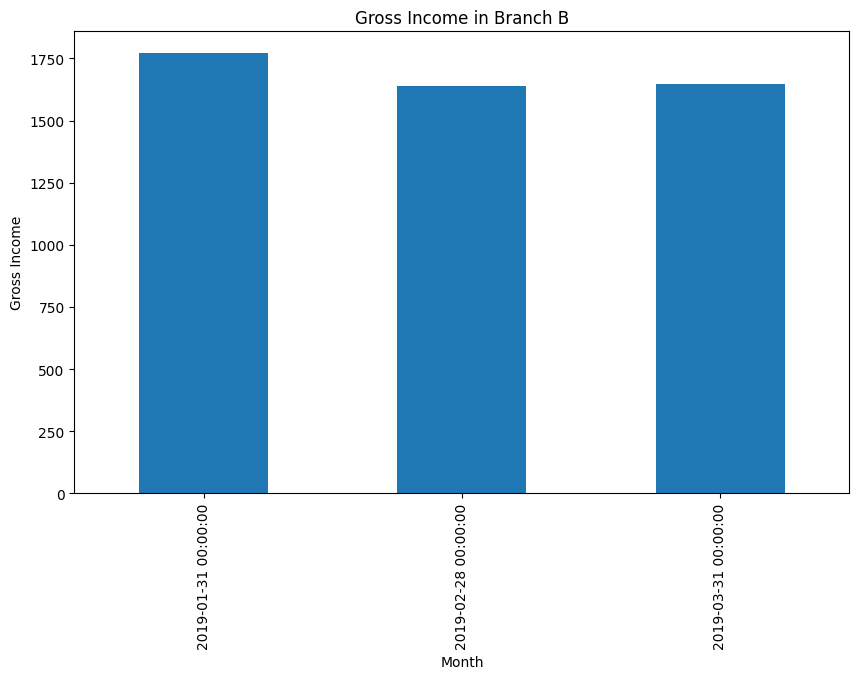

In [ ]:
# Resample the data by month and sum the gross income
monthly_gross_income = df_branch_1['gross income'].resample('M').sum()

# Plot the monthly gross income
monthly_gross_income.plot(kind='bar', figsize=(10, 6), title='Gross Income in Branch B')
plt.xlabel('Month')
plt.ylabel('Gross Income')
plt.show()

/tmp/ipykernel_158065/1701613646.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_gross_income = df_branch_2['gross income'].resample('M').sum()


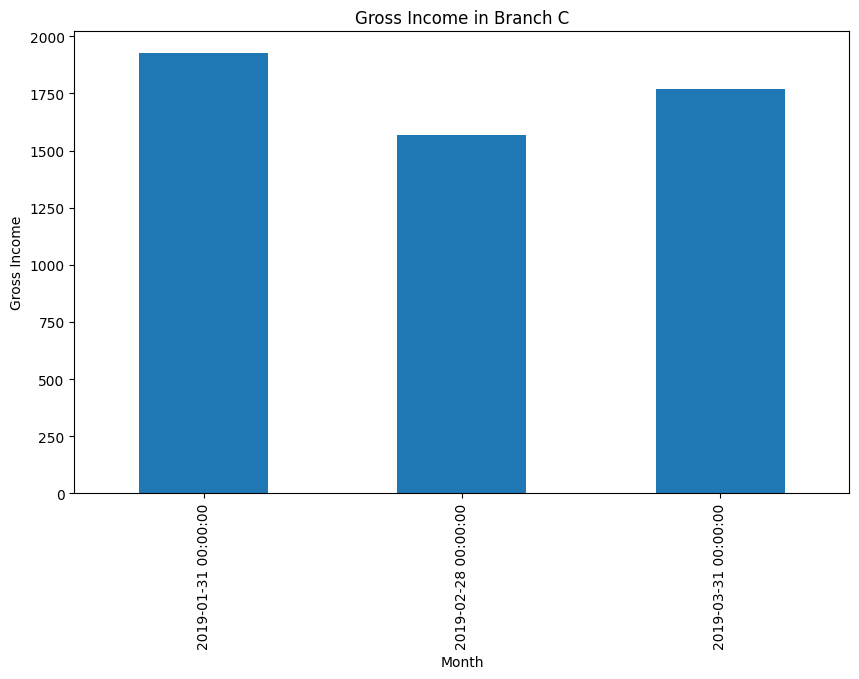

In [27]:
# Resample the data by month and sum the gross income
monthly_gross_income = df_branch_2['gross income'].resample('M').sum()

# Plot the monthly gross income
monthly_gross_income.plot(kind='bar', figsize=(10, 6), title='Gross Income in Branch C')
plt.xlabel('Month')
plt.ylabel('Gross Income')
plt.show()

### Gross Income by Branches and product line

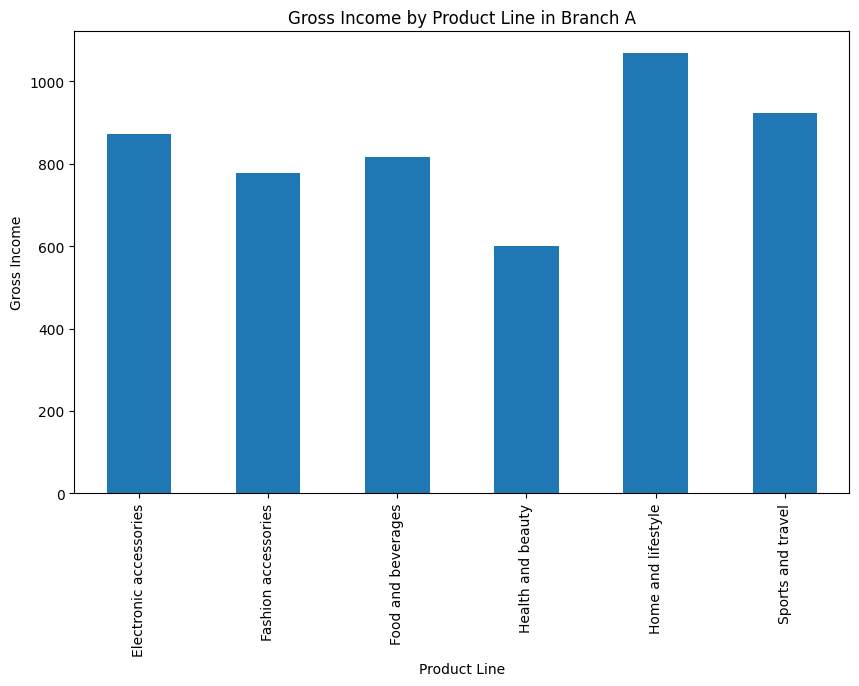

In [44]:
# Group by product line and sum the gross income
gross_income_by_product_line = df_branch_0.groupby('Product line')['gross income'].sum()
gross_income_by_product_line.index = le[4].inverse_transform(gross_income_by_product_line.index)
# Plot the gross income by product line
gross_income_by_product_line.plot(kind='bar', figsize=(10, 6), title='Gross Income by Product Line in Branch A')
plt.xlabel('Product Line')
plt.ylabel('Gross Income')
plt.show()



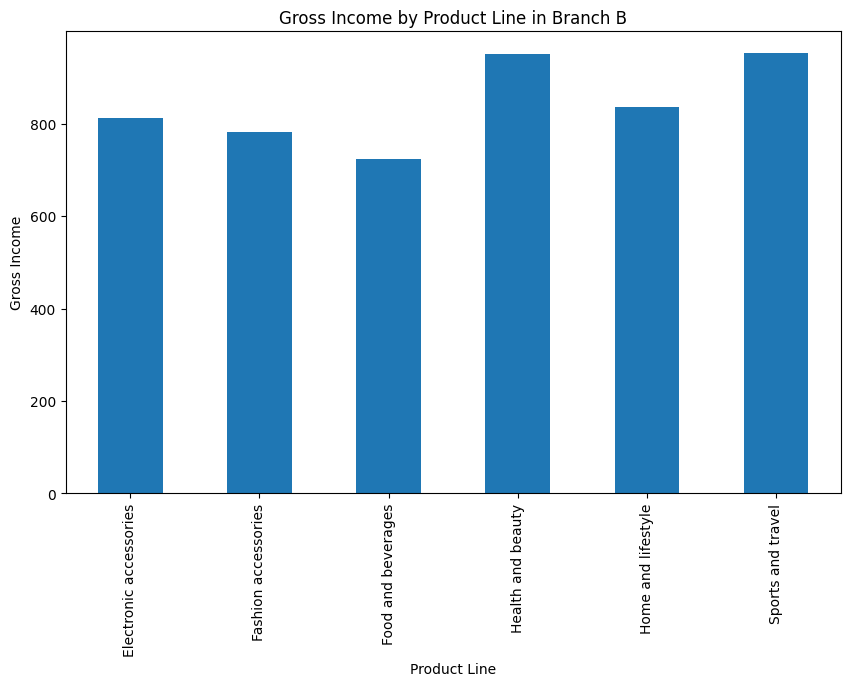

In [46]:
# Group by product line and sum the gross income
gross_income_by_product_line = df_branch_1.groupby('Product line')['gross income'].sum()
gross_income_by_product_line.index = le[4].inverse_transform(gross_income_by_product_line.index)
# Plot the gross income by product line
gross_income_by_product_line.plot(kind='bar', figsize=(10, 6), title='Gross Income by Product Line in Branch B')
plt.xlabel('Product Line')
plt.ylabel('Gross Income')
plt.show()



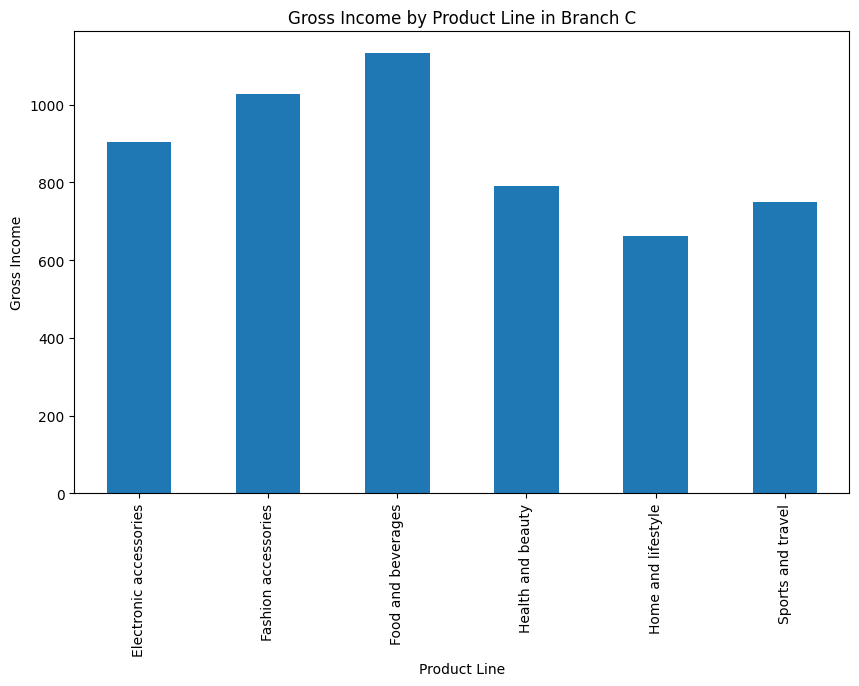

In [47]:
# Group by product line and sum the gross income
gross_income_by_product_line = df_branch_2.groupby('Product line')['gross income'].sum()
gross_income_by_product_line.index = le[4].inverse_transform(gross_income_by_product_line.index)
# Plot the gross income by product line
gross_income_by_product_line.plot(kind='bar', figsize=(10, 6), title='Gross Income by Product Line in Branch C')
plt.xlabel('Product Line')
plt.ylabel('Gross Income')
plt.show()



#### Gross Income by Product Line and Gender

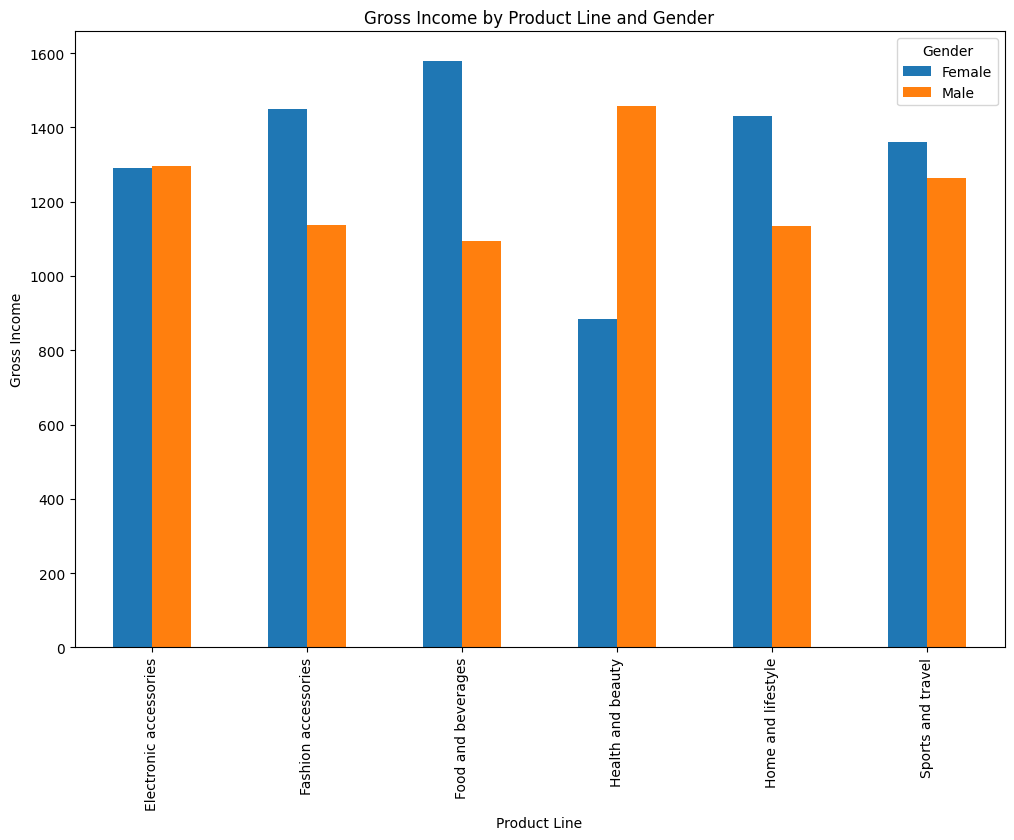

In [57]:
# Group by product line and gender, then sum the gross income
gross_income_by_product_line_gender = df_orig.groupby(['Product line', 'Gender'])['gross income'].sum().unstack()

# Plot the gross income by product line and gender


gross_income_by_product_line_gender.plot(kind='bar', figsize=(12, 8), title='Gross Income by Product Line and Gender')
plt.xlabel('Product Line')
plt.ylabel('Gross Income')
plt.show()

#### Gross Income By Payment

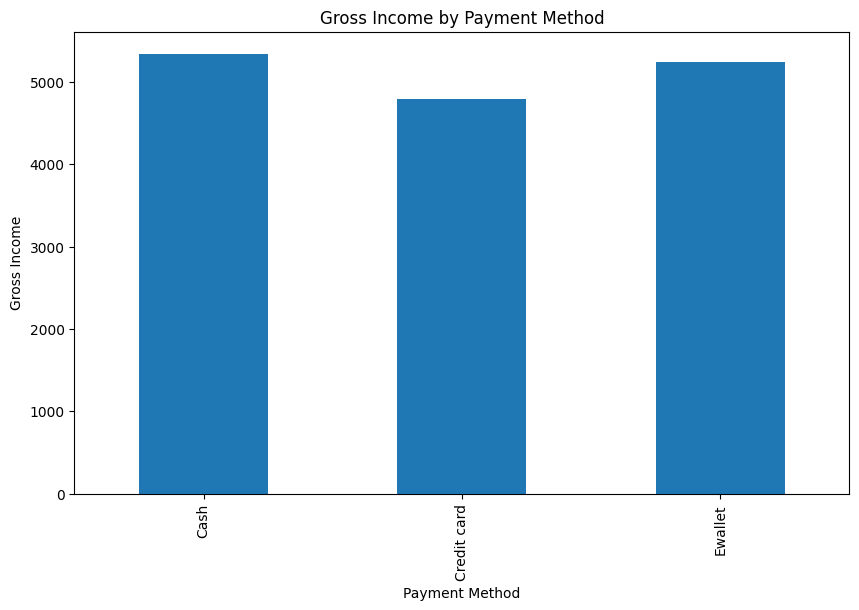

In [58]:
# Group by payment method and sum the gross income
gross_income_by_payment = df_orig.groupby('Payment')['gross income'].sum()

# Plot the gross income by payment method
gross_income_by_payment.plot(kind='bar', figsize=(10, 6), title='Gross Income by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Gross Income')
plt.show()

### Payment Method by Gender

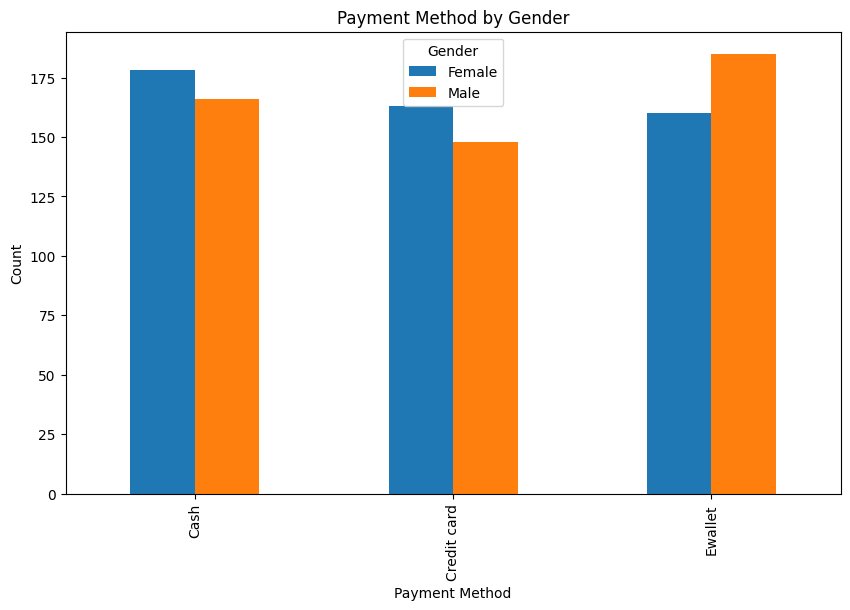

In [59]:
# Group by payment method and gender, then count the occurrences
payment_method_by_gender = df_orig.groupby(['Payment', 'Gender']).size().unstack()

# Plot the payment method by gender
payment_method_by_gender.plot(kind='bar', figsize=(10, 6), title='Payment Method by Gender')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()